In [1]:
import pandas as pd
import torch
import numpy as np
import pyntcloud
import pandas as pd 
import matplotlib.pyplot as plt

In [11]:
building_model = pyntcloud.PyntCloud.from_file("../results/south-building/epochs_30_000/model.ply")
city_model = pyntcloud.PyntCloud.from_file("../results/small_city_road_down_test/buck/ckpt_219999_rank0.ply")
city_model_2 = pyntcloud.PyntCloud.from_file("../results/small_city_road_down_test/alpaca/model.ply")

In [6]:
building_model.points.columns

Index(['x', 'y', 'z', 'a', 'q0', 'q1', 'q2', 'q3', 's0', 's1', 's2', 'sh0_x',
       'sh0_y', 'sh0_z', 'sh1_x', 'sh1_y', 'sh1_z', 'sh2_x', 'sh2_y', 'sh2_z',
       'sh3_x', 'sh3_y', 'sh3_z', 'sh4_x', 'sh4_y', 'sh4_z', 'sh5_x', 'sh5_y',
       'sh5_z', 'sh6_x', 'sh6_y', 'sh6_z', 'sh7_x', 'sh7_y', 'sh7_z', 'sh8_x',
       'sh8_y', 'sh8_z', 'sh9_x', 'sh9_y', 'sh9_z', 'sh10_x', 'sh10_y',
       'sh10_z', 'sh11_x', 'sh11_y', 'sh11_z', 'sh12_x', 'sh12_y', 'sh12_z',
       'sh13_x', 'sh13_y', 'sh13_z', 'sh14_x', 'sh14_y', 'sh14_z', 'sh15_x',
       'sh15_y', 'sh15_z'],
      dtype='object')

In [8]:
bm_scales = np.exp(np.concatenate([building_model.points['s0'], building_model.points['s1'], building_model.points['s2']]))

In [9]:
np.percentile(bm_scales, 90)

0.006715192459523678

(array([1620134.,  235214.,  142797.,  106153.,   86289.,   72873.,
          61429.,   50603.,   41426.,   33539.]),
 array([1.64806545e-06, 9.86867235e-04, 1.97208649e-03, 2.95730564e-03,
        3.94252501e-03, 4.92774416e-03, 5.91296330e-03, 6.89818244e-03,
        7.88340159e-03, 8.86862073e-03, 9.85383987e-03]),
 <BarContainer object of 10 artists>)

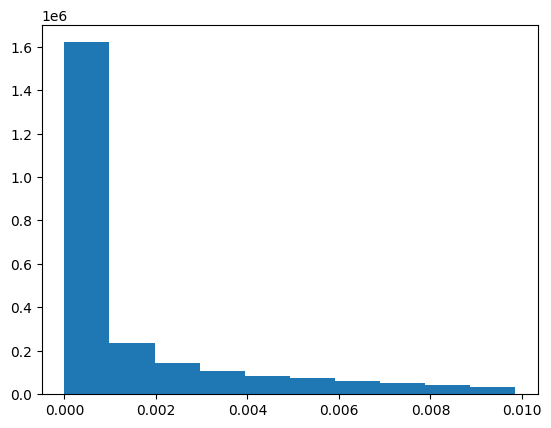

In [10]:
plt.hist(bm_scales[(bm_scales < np.percentile(bm_scales, 95)) & (bm_scales > np.percentile(bm_scales, 5))])

In [12]:
c_scales = np.exp(np.concatenate([city_model.points['s0'], city_model.points['s1'], city_model.points['s2']]))

Scales are large!

(array([3436815.,  302026.,  272609.,  202218.,  146275.,  107294.,
          81461.,   63230.,   50424.,   40302.]),
 array([7.46429322e-17, 6.35297876e-03, 1.27059575e-02, 1.90589372e-02,
        2.54119150e-02, 3.17648947e-02, 3.81178744e-02, 4.44708541e-02,
        5.08238301e-02, 5.71768098e-02, 6.35297894e-02]),
 <BarContainer object of 10 artists>)

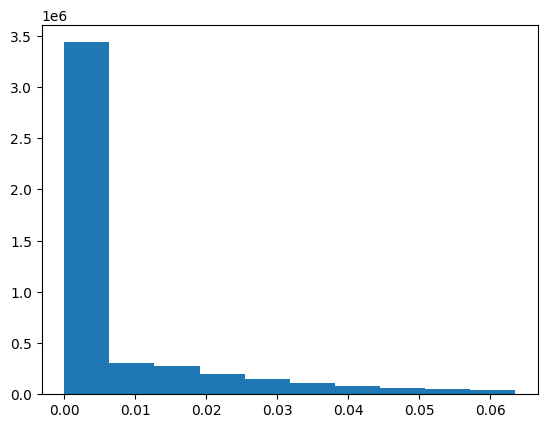

In [13]:
plt.hist(c_scales[(c_scales < np.percentile(c_scales, 95)) & (c_scales > np.percentile(c_scales, 5))])

In [14]:
len(building_model.points)

907577

There are too little splats probably

In [15]:
len(city_model.points)

1741724

In [16]:
c2_scales = np.exp(np.concatenate([city_model_2.points['s0'], city_model_2.points['s1'], city_model_2.points['s2']]))

(array([1929966.,  333660.,  156775.,   97243.,   67065.,   49845.,
          38420.,   30594.,   25269.,   20717.]),
 array([9.41203529e-15, 1.01219658e-02, 2.02439316e-02, 3.03658955e-02,
        4.04878631e-02, 5.06098270e-02, 6.07317910e-02, 7.08537549e-02,
        8.09757262e-02, 9.10976902e-02, 1.01219654e-01]),
 <BarContainer object of 10 artists>)

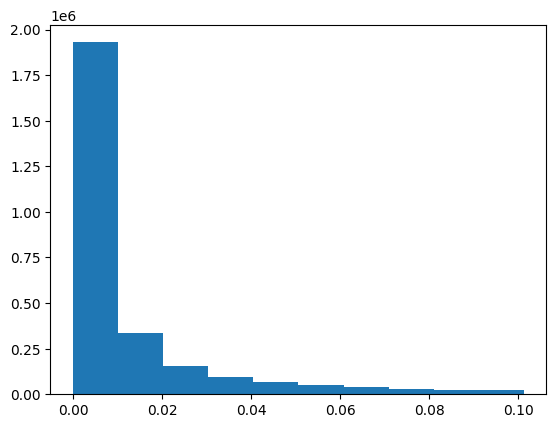

In [17]:
plt.hist(c2_scales[(c2_scales < np.percentile(c2_scales, 95)) & (c2_scales > np.percentile(c2_scales, 5))])

(array([56277., 22333., 12645.,  9598.,  7874.,  6306.,  4747.,  3733.,
         2785.,  1988.]),
 array([0.02810702, 0.22757958, 0.42705214, 0.62652469, 0.82599729,
        1.02546978, 1.22494245, 1.42441499, 1.62388754, 1.82336009,
        2.02283263]),
 <BarContainer object of 10 artists>)

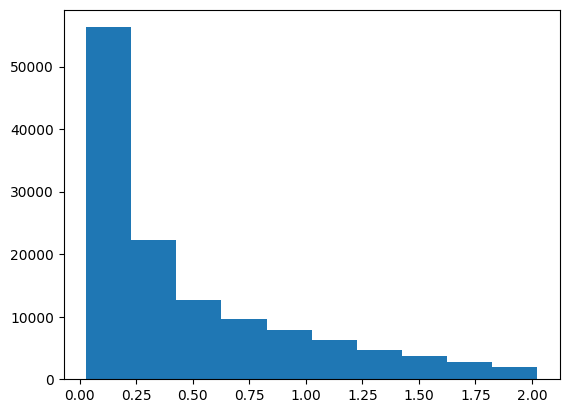

In [9]:
plt.hist(c2_scales[(c2_scales < np.percentile(c2_scales, 95)) & (c2_scales > np.percentile(c2_scales, 5))])